# Grouping and Merging Walkthrough

**by: Raguvir Kunani** for Data 100, Summer 2019

This notebook is meant to (very briefly) introduce the concepts of grouping and merging. More importantly, I want to touch on common use cases as well as mistakes I've seen students make. Hope this is helpful for you!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Throughout the notebook, we will be using data collected by the State of Connecticut on SAT scores and participation. You can find the data [here](https://catalog.data.gov/dataset/sat-school-participation-and-performance-2012-2013).

In [2]:
data_path = './data/SAT_School_Participation_and_Performance__2012-2013.csv'
sat = pd.read_csv(data_path)
# Drop columns we don't need
drop_cols = ['Participation Rate (estimate): Change%', 'Percent Meeting Benchmark: Change%', "Test-takers: Change%"]
sat = sat.drop(labels=drop_cols, axis='columns')

## Grouping

### Motivating the Concept of Grouping

Often, we have data that contains multiple groups within it. For example, the [US Census](https://www.census.gov/quickfacts/fact/table/US/PST045218) (which primarily serves to count how many people are in the US) contains data about people of different ages, races, and education levels. In cases like this, we might want to draw conclusions about each group within the data separately.

For example, we may ask "How does income differ among people with different education levels?" or "How does unemployment differ among people in different geographical areas?". Questions like these are most easily answered by using grouping.

**Grouping is the act of partitioning the elements of our data into groups, based on a certain attribute (or set of attributes) each element has.** Census data, for example can be grouped by age, by state, or by income level.

### Grouping Syntax

Grouping in `pandas` is syntactically simple. To group a DataFrame `df` by the column `col_name`, we simply write `df.groupby('col_name)`. This divides each row of `df` into groups based on the value a given row has for the column `col_name`. **Each unique value of `col_name` gets its own group.**

Let's take a look at our SAT data to see what groups could exist within it.

In [3]:
sat.head()

,District Number,District,School,Test-takers: 2012,Test-takers: 2013,Participation Rate (estimate): 2012,Participation Rate (estimate): 2013,Percent Meeting Benchmark: 2012,Percent Meeting Benchmark: 2013
0,26111,Ansonia,Ansonia High School,118.0,104.0,67.0,61.0,18.0,18.0
1,46111,Avon,Avon High School,254.0,243.0,90.0,89.0,73.0,75.0
2,76111,Berlin,Berlin High School,216.0,220.0,81.0,82.0,42.0,49.0
3,96111,Bethel,Bethel High School,200.0,190.0,86.0,82.0,51.0,49.0
4,116111,Bloomfield,Bloomfield High School,116.0,130.0,79.0,89.0,11.0,8.0


It looks like each row in `sat` corresponds to one school. Each school belongs to a district, so we can group `sat` by district:

In [4]:
sat.groupby('District')

**Notice that the result of `.groupby` is a `DataFrameGroupBy` object, *not* a `DataFrame`.** This is a commonly forgotten property of `.groupby` in `pandas`. Remembering it will save you a lot of headache in the future for debugging.

### Grouping Examples (Use Cases)

`DataFrameGroupBy` objects have an important method that you will use extensively in this class: `.agg(func)`.

- `.agg(func)` *aggregates* each group with `func`, computing a single value for **each column** of each group. For example, `.agg(sum)` computes the sum of each column in the group. In the end, you will have 1 value for each column of each group.

**Note:** `func` can be *any* function, even functions you define. Plugging in custom functions is something this class makes heavy use of, and the most convenient way of using custom functions for `.agg` is to use lambda functions (I know, your favorite functions).

Another note: `DataFrameGroupBy` objects also have a `.filter(func)` method, which only keeps elements from each group that meet the criteria specified by `func`. You probably won't need `filter` too much in this class but it's useful in general so I thought it would be worth mentioning here.

#### Using the `.agg` method

Now that we have grouped `sat` by district, we can form conclusions about the SAT participation and scores of each district. **Let's see what the average number of test-takers in 2012 was for each district.**

In [5]:
avg_test_takers_2012 = sat.groupby('District')['Test-takers: 2012'].agg('mean')

# You can also do the same thing with a lambda function
# avg_test_takers_2012 = sat.groupby('District')["Test-takers: 2012"].agg(lambda group: sum(group)/len(group))

avg_test_takers_2012.head()

District
Amistad Academy District     34.0
Ansonia                     118.0
Avon                        254.0
Berlin                      216.0
Bethel                      200.0
Name: Test-takers: 2012, dtype: float64

Let's unpack what just happened by looking at each part of `sat.groupby('District')['Test-takers: 2012'].agg('mean')`:

1. `sat.groupby('District')` groups the rows (schools) by district


2. `sat.groupby('District')['Test-takers: 2012']` selects only the `'Test-takers: 2012'` column from each group


3. `sat.groupby('District')['Test-takers: 2012'].agg('mean')` aggregates the `'Test-takers: 2012'` column within each group by taking the average of the column.

**Note:** The order of aggregating and selecting the desired column(s) does not matter. The only thing that matters is you *must* group first. This means that `sat.groupby('District').agg('mean')['Test-takers: 2012']` will give the same output.

**Tip:** Whenever you want to compute a single value (e.g. average, sum, max, min, etc.) for each group in your data, you should use `.agg` with the appropriate aggregating function. In this example, the single value we wanted to compute was the average number of test-takers in 2012.

**Quiz:** Write code that computes the **number of schools in each district**. The result should be a `Series` where the index is a district and the value is the number of schools in that district.

In [6]:
# This is the answer to the question above. Please attempt to solve the question before looking at the solution;
# it's the best way to learn.

num_schools_per_district = sat.groupby('District')['School'].agg(lambda group: len(group))
num_schools_per_district.head()

District
Amistad Academy District    1
Ansonia                     1
Avon                        1
Berlin                      1
Bethel                      1
Name: School, dtype: int64

### Grouping Common Mistakes

#### Forgetting that the result of grouping is not a `DataFrame`

Many students try to see the result of what happens right after grouping by a column. Specifically, a lot of students try to use the `.head()` method of a `DataFrame` to check if the groups look correct. While a `DataFrameGroupBy` object happens to also have a `.head()` method, it works slightly differently than the `.head()` for a `DataFrame`.

You won't be so lucky if try to get the `.shape` of a `DataFrameGroupBy` object.

#### Calling lambda functions on the `DataFrameGroupBy` object instead of using `.agg(func)`

Many students have the right intention of using a lambda function to compute the desired value after grouping, but they often write the lambda function as taking the `DataFrameGroupBy` object as the input rather than using `.agg`. While there could be a way to make this approach also work to get the right answer (I'm not sure if it exists but I would think with enough hacking one could make it work), the authors of `pandas` have spent so much time writing and optimizing the `.agg` method to be much easier to use.

#### Grouping by a non-categorical or continuous variable

Grouping is best used for categorical or otherwise discrete variables. If the idea of grouping is to split data into groups based on what value each element of the data takes on for a certain variable, it makes sense that we want the variable to take on a limited number of values. Otherwise, we will have too many groups (and each group will be relatively uninformative).

## Merging

### Motivating the Concept of Merging

Often, we want to know something about our data that our data doesn't capture. In other to find this extra information, we find another source of data. In the Census example, we might want to understand the demographics of states that tend to vote Republican versus Democratic. To do this, we would have to find information about how each state historically votes.

In order for us to use that extra information to make conclusions, we have to *merge* our data with the additional data. **Merging is the act of combining our data with another separate dataset, where the combination exploits a relationship between one variable in our data and one variable in the other dataset.**


### Merging Syntax

`pandas` has 2 different ways of merging `DataFrame`s:

1. `pd.merge(left, right, how, left_on, right_on)`: merges `left` with `right` using the join specified by `how`, where the value for `left_on` is the same as the value for `right_on` 


2. `df.merge(right, how, left_on, right_on)`: same as `pd.merge`, where `df` is `left`

Let's see some examples of these 2 merging methods in action. To do this, we will merge our SAT data with data about school quality. You can find the school quality data [here](https://catalog.data.gov/dataset/state-department-of-education-next-generation-school-accountability-data-2014-2015).

In [7]:
data_path = './data/State_Department_of_Education_Next_Generation_School_Accountability_data_2014-2015.csv'
acc = pd.read_csv(data_path)

# Filtering using boolean arrays
acc = acc[acc["School Name"].str.contains("High School")]
# Data cleaning using regex
acc["School Name"] = acc["School Name"].str.replace("_[0-9]+", "", regex=True)

acc.head()

,District Name,District Code,School Name,School Code,School OrgType,School Low Grade,School High Grade,School Title I Type,Category,Total Points,...,Grad6YrHNNHNDiff,Threshold_Mean_ELA,Threshold_Mean_Math,Threshold_Mean_Sci,Threshold_Mean_Grad,Classification,State Category,# of Distinctions,School of Distinction - Highest Performing Overall,School of Distintion - Highest Performing High Needs
6,Ansonia School District,20011,Ansonia High School,26111,Public Schools,9,12.0,NaN,SchoolTot,890.9,...,11.6,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
14,Avon School District,40011,Avon High School,46111,Public Schools,9,12.0,Targeted Assistance,SchoolTot,1077.2,...,0.8,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
23,Berlin School District,70011,Berlin High School,76111,Public Schools,9,12.0,Targeted Assistance,SchoolTot,903.3,...,-4.3,16.8,19.5,17.3,12.6,FOCUS ELA,4.0,0,NaN,NaN
31,Bethel School District,90011,Bethel High School,96111,Public Schools,9,12.0,Targeted Assistance,SchoolTot,1018.6,...,-0.5,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
38,Bloomfield School District,110011,Bloomfield High School,116111,Public Schools,9,12.0,NaN,SchoolTot,969.9,...,3.4,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN


#### Using `pd.merge`:

In [8]:
pandas_merge = pd.merge(left=sat, right=acc, how='inner', left_on="School", right_on="School Name")
pandas_merge.head()

,District Number,District,School,Test-takers: 2012,Test-takers: 2013,Participation Rate (estimate): 2012,Participation Rate (estimate): 2013,Percent Meeting Benchmark: 2012,Percent Meeting Benchmark: 2013,District Name,...,Grad6YrHNNHNDiff,Threshold_Mean_ELA,Threshold_Mean_Math,Threshold_Mean_Sci,Threshold_Mean_Grad,Classification,State Category,# of Distinctions,School of Distinction - Highest Performing Overall,School of Distintion - Highest Performing High Needs
0,26111,Ansonia,Ansonia High School,118.0,104.0,67.0,61.0,18.0,18.0,Ansonia School District,...,11.6,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
1,46111,Avon,Avon High School,254.0,243.0,90.0,89.0,73.0,75.0,Avon School District,...,0.8,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
2,76111,Berlin,Berlin High School,216.0,220.0,81.0,82.0,42.0,49.0,Berlin School District,...,-4.3,16.8,19.5,17.3,12.6,FOCUS ELA,4.0,0,NaN,NaN
3,96111,Bethel,Bethel High School,200.0,190.0,86.0,82.0,51.0,49.0,Bethel School District,...,-0.5,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
4,116111,Bloomfield,Bloomfield High School,116.0,130.0,79.0,89.0,11.0,8.0,Bloomfield School District,...,3.4,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN


Let's unpack what just happened:

- We set `left=sat` and `right=acc`. This tells `pandas` that the left table is `sat` and the right table is `acc`. The reason why we have to define a left and right table is because of joining. In most cases, it doesn't matter which table you set to be `left` or `right` as long as you use the appropriate join.


- We set `left_on="School"` and `right_on="School Name"`. This tells `pandas` what the relationship between the left and the right tables is. In this case, we are saying that the `"School"` column of the left table is related to the `"School Name"` column of the right table. 


- We set `how='inner'`. This tells `pandas` we want to do an *inner join*, meaning we want our merged `DataFrame` to only contain rows where the value of `left_on` matches a value of `right_on`. Inner joins are the most common form of joins, but there are other types of joins too. The 'Joins' section of [this part](https://www.textbook.ds100.org/ch/05/cleaning_structure.html) of the textbook does a great job explaining the differences between types of joins.

#### Using `df.merge`:

We can do the exact same merge using `df.merge`. The only difference is that `df` is what `left` was in `pd.merge`.

In [9]:
df_merge = sat.merge(right=acc, how='inner', left_on='School', right_on='School Name')
df_merge.head()

,District Number,District,School,Test-takers: 2012,Test-takers: 2013,Participation Rate (estimate): 2012,Participation Rate (estimate): 2013,Percent Meeting Benchmark: 2012,Percent Meeting Benchmark: 2013,District Name,...,Grad6YrHNNHNDiff,Threshold_Mean_ELA,Threshold_Mean_Math,Threshold_Mean_Sci,Threshold_Mean_Grad,Classification,State Category,# of Distinctions,School of Distinction - Highest Performing Overall,School of Distintion - Highest Performing High Needs
0,26111,Ansonia,Ansonia High School,118.0,104.0,67.0,61.0,18.0,18.0,Ansonia School District,...,11.6,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
1,46111,Avon,Avon High School,254.0,243.0,90.0,89.0,73.0,75.0,Avon School District,...,0.8,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
2,76111,Berlin,Berlin High School,216.0,220.0,81.0,82.0,42.0,49.0,Berlin School District,...,-4.3,16.8,19.5,17.3,12.6,FOCUS ELA,4.0,0,NaN,NaN
3,96111,Bethel,Bethel High School,200.0,190.0,86.0,82.0,51.0,49.0,Bethel School District,...,-0.5,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN
4,116111,Bloomfield,Bloomfield High School,116.0,130.0,79.0,89.0,11.0,8.0,Bloomfield School District,...,3.4,16.8,19.5,17.3,12.6,NaN,NaN,0,NaN,NaN


We can also confirm that `pandas_merge` and `df_merge` are the same:

In [10]:
pandas_merge.equals(df_merge)

True

### Merging Use Cases

Now that we have a merged table, we can answer more questions about our data than we could have with just our original data.

**Let's see whether there seems to be a relationship between the SAT participation rate of a school and their Accountability Index**, which aims to measure how well a school prepares a student for success beyond high school.

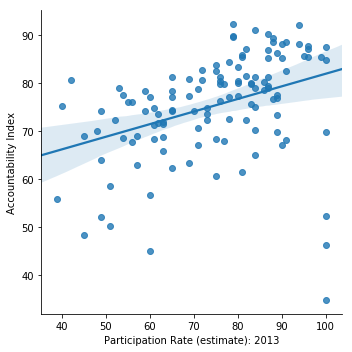

In [11]:
sns.lmplot(x="Participation Rate (estimate): 2013", y='Accountability Index', data=pandas_merge);

Excepting a few outliers, there seems to be a positive relationship between participation rate and accountability index. Thus, we have evidence (though not strong) to claim that in Connecticut, students who took the SAT were more prepared for life after high school than those who didn't. 

With the original data, we were unable to make such a claim. But with merging, we made use of information outside our original data to make broader claims.

### Merging Common Mistakes

#### Using the wrong type of join

The most common mistake students make in merging is using the wrong type of join. The only way to avoid this mistake is to really understand what the differences between types of joins are, which is really well described in [this section of the textbook.](https://www.textbook.ds100.org/ch/05/cleaning_structure.html)

**Tip:** In this course (and in general), you will most likely be using an inner join or a left join.

#### Forgetting to specify `left_on` and `right_on`

Many students forget that merging 2 tables is not just attaching one table to the end of another. The reason we merge tables is because there is some relationship between those 2 tables. When we merge, we use that relationship to match rows of one table with rows of the other table. In `pandas`, we specify the relationship between tables using the `left_on` and `right_on` arguments.

In our example, both tables had a column containing the name of the school, so we used those columns to merge the tables.

# Conclusion

I really hope this notebook clarified any doubts/misconceptions you may have had about grouping or merging.

If you have any questions or feedback, you can email me (rkunani@berkeley.edu) or post on Piazza!